In [1]:

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Particle:
    def __init__(self, dim, init_type='gaussian', init_mean=0.0, init_std=1.0):
        if init_type == 'gaussian':
            self.position = np.random.normal(loc=init_mean, scale=init_std, size=dim)  # Initialize particle's position randomly using Gaussian distribution
            self.velocity = np.random.normal(loc=init_mean, scale=init_std, size=dim)  # Initialize particle's velocity randomly using Gaussian distribution
            self.best_position = self.position.copy()  # Initialize best position as current position
            self.best_score = float('inf')  # Initialize best score as infinity
        else:
            raise ValueError("Invalid initialization type. Use 'gaussian'.")

In [3]:
def ackley(xx, a=20, b=0.2, c=2*np.pi):
    """
    Ackley Function
    
    xx: numpy array containing the coordinates of the point
    a, b, c: constants (optional), with default values 20, 0.2, and 2*pi respectively
    """
    d = len(xx)
    
    sum1 = np.sum(xx**2)
    sum2 = np.sum(np.cos(c * xx))

    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)

    y = term1 + term2 + a + np.exp(1)
    return y

In [4]:
def pso(objective_function, num_particles, max_iterations, dim, init_type='gaussian', init_mean=0.0, init_std=1.0,plot = True):
    particles = [Particle(dim, init_type, init_mean, init_std) for _ in range(num_particles)]  # Initialize particles

    global_best_position = np.random.normal(loc=init_mean, scale=init_std, size=dim)  # Initialize global best position randomly using Gaussian distribution
    global_best_score = float('inf')  # Initialize global best score as infinity
    fitness_history = []
    for _ in range(max_iterations):
        for particle in particles:
            # Evaluate particle's current position
            score = objective_function(particle.position)

            # Update particle's best position and score if current position is better
            if score < particle.best_score:
                particle.best_position = particle.position.copy()
                particle.best_score = score

            # Update global best position and score if current particle's best is better
            if score < global_best_score:
                global_best_position = particle.best_position.copy()
                global_best_score = score

            # Update particle's velocity and position
            inertia_weight = 0.5
            cognitive_weight = 1.5
            social_weight = 1.5
            r1, r2 = np.random.rand(dim), np.random.rand(dim)  # Random numbers for stochasticity

            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * r1 * (particle.best_position - particle.position) +
                                 social_weight * r2 * (global_best_position - particle.position))
            particle.position += particle.velocity
        fitness_history.append(global_best_score)
    if plot:
        plt.plot(fitness_history)
        plt.title("Convergence Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")
        plt.show()
    return global_best_position, global_best_score

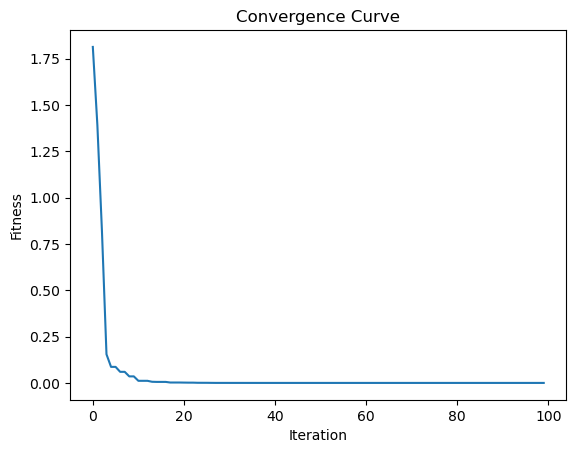

[4.93802313e-13 1.24915399e-12] 3.7982950118475856e-12


In [5]:
#num_particles = 30

#max_iterations = 100
#dim = 2

best_position , best_score  = pso(ackley , num_particles=30 , max_iterations=100 , dim=2 , plot=True)

print( best_position,best_score )
